In [1]:
import pandas as pd
import numpy as np

# Increase the maximum number of rows & columns displayed to 50.
pd.set_option('display.max_column', 50)
pd.set_option('display.max_row', 50)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
data = pd.read_csv('../Data/2010 2015-ACS_Jan15.csv', header=0)

In [163]:
#data.head()

In [164]:
#data.describe()

In [149]:
#data[data['Median income'] == '-' ]

In [151]:
#Since all the values in the Ids 397 and 795 are missing, deleting these 2 rows
#data = data.drop(data[data['Median income'] == '-' ].index)

In [ ]:
# following two census tracts which are present in 2010 and not in 2015, hence deleting them
#53033005302: not present in 2015
#53033032800: not present in 2015
#53033004302: not present in 2010

In [ ]:
# Alternate histogram plot
fig, axs = plt.subplots(1, 1, figsize=(8, 5), sharex=True, sharey=True)
plt.grid(True) # Show grid
plt.hist(data['Median House value (dollars)'])
plt.title("Histogram of Median House Values (Dollars)")

(array([  13.,  237.,  317.,  146.,   51.,   16.,    9.,    0.,    0.,    2.]),
 array([   22200.,   175540.,   328880.,   482220.,   635560.,   788900.,
          942240.,  1095580.,  1248920.,  1402260.,  1555600.]),
 <a list of 10 Patch objects>)

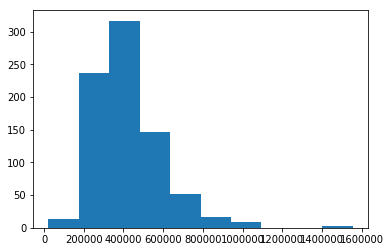

In [153]:
plt.hist(data['Median House value (dollars)'])

### Definition 1: Sociology 
#### Eligible for Gentrification:
* The block group’s median household income was in the bottom 40th percentile when compared to all block groups in Seattle at the beginning of the time span.
* The block group’s median house value was in the bottom 40th percentile when compared to all block groups in Seattle at the beginning of the time span.

#### Have gentrified:
* An increase in a block group’s educational attainment, as measured by the percentage of residents age 25 and over holding bachelor’s degrees, was in the top third percentile of all block groups in Seattle.
* An increase in a block group’s median house value, as measured by inflation-adjusted median house value, was in the top third percentile of all block groups in Seattle.


#### Calculations for Part1: Eligible for gentrification

In [4]:
# get the columns in variable names
median_income =np.array(data['Median income'])
median_housevalue =np.array(data['Median House value (dollars)'])

In [5]:
# find percentiles for median income, house value and bachelor degree holders
income_40th_perc = np.percentile(median_income, 40)
houseval_40th_perc = np.percentile(median_housevalue, 40)

#### Calculations for Part2: Have gentrified

In [6]:
def add_col_for_inflation_adjusted_house_price_2010(row):
    if row['Year'] == 2010:
        return row['Median House value (dollars)']*1.08

In [7]:
#inflation_adj_median_house_value = data.apply(add_col_for_inflation_adjusted_house_price_2010, axis = 1)
data['inflation_adj_median_house_value'] = data.apply(add_col_for_inflation_adjusted_house_price_2010, axis = 1)

In [8]:
# get unique tract ids to iterate thru all records of 2015 and 2010
tract_id = data.Id.unique()

In [9]:
increase_in_edu_attainment_2015 = []
for s in tract_id:
    i = np.where(data['Id'] == s) # gives two indexes for each tract id(one for 2015 and another for 2010)
    # to find the percentage increase subtract the bachelors degree % for 2010 from bachelors degree % of 2015
    perc_increase = data['Percentage: bachelors degree or higher'].iloc[i[0][0]] - data['Percentage: bachelors degree or higher'].iloc[i[0][1]]
    increase_in_edu_attainment_2015.append(perc_increase)

In [10]:
increase_in_house_value_2015 = []
for s in tract_id:
    i = np.where(data['Id'] == s)
    perc_increase = data['Median House value (dollars)'].iloc[i[0][0]] - data['inflation_adj_median_house_value'].iloc[i[0][1]]
    increase_in_house_value_2015.append(perc_increase)

In [11]:
data['increase_in_edu_attainment_2015'] = pd.Series(increase_in_edu_attainment_2015)
data['increase_in_house_value_2015'] = pd.Series(increase_in_house_value_2015)

In [12]:
increase_bachelor_degree_top3rd_percentile = np.percentile(increase_in_edu_attainment_2015, 66)
increase_house_value_top3rd_percentile = np.percentile(increase_in_house_value_2015, 66)

In [13]:
increase_house_value_top3rd_percentile

-37035.279999999999

#### Labelling the tracts per definition 1

In [17]:
def label_def1(row):
   if row['Year'] == 2010:
      return 'None'
   if row['Year'] == 2015 and row['Median income'] < income_40th_perc and row['Median House value (dollars)'] < houseval_40th_perc:
      return 'EligibleForGentrification'
   if row['Year'] == 2015 and row['increase_in_edu_attainment_2015'] > increase_bachelor_degree_top3rd_percentile and row['increase_in_house_value_2015'] > increase_house_value_top3rd_percentile:
      return 'HaveGentrified'
   else:
      return 'NotEligibleForGentrification'

In [18]:
data['def1'] = data.apply(label_def1, axis=1)

In [19]:
data.head()

,Id,Geography,Total; Estimate; AGE - 25 to 29 years,Total; Estimate; AGE - 30 to 34 years,Total; Estimate; AGE - 35 to 39 years,Total; Estimate; AGE - 40 to 44 years,Total; Estimate; AGE - 45 to 49 years,Total; Estimate; AGE - 50 to 54 years,Total; Estimate; AGE - 55 to 59 years,Total; Estimate; AGE - 60 to 64 years,...,Estimate; Total: - 3 vehicles available,Estimate; Total: - 4 or more vehicles available,Percentage: Not Hispanic or Latino: - White,Estimate; Not Hispanic or Latino: - White alone,Estimate; Total:.1,Year,inflation_adj_median_house_value,increase_in_edu_attainment_2015,increase_in_house_value_2015,def1
0,53033000100,"Census Tract 1, King County, Washington",10.8,12.2,5.0,7.8,5.1,5.8,5.9,7.2,...,337.0,68.0,0.58,3987,6918,2015,NaN,-1.9,-126384.0,NotEligibleForGentrification
1,53033000200,"Census Tract 2, King County, Washington",11.5,7.2,5.5,6.0,5.9,7.5,7.0,8.0,...,353.0,30.0,0.57,4520,7974,2015,NaN,3.4,-44996.0,EligibleForGentrification
2,53033000300,"Census Tract 3, King County, Washington",10.7,8.4,7.7,8.0,4.7,7.4,8.1,5.2,...,127.0,16.0,0.71,1880,2637,2015,NaN,-4.9,-37920.0,EligibleForGentrification
3,53033000401,"Census Tract 4.01, King County, Washington",9.0,10.4,11.0,4.1,6.0,3.5,5.6,5.7,...,93.0,36.0,0.55,3238,5907,2015,NaN,9.8,-78068.0,EligibleForGentrification
4,53033000402,"Census Tract 4.02, King County, Washington",9.3,6.7,5.2,7.1,8.6,5.8,6.0,9.3,...,340.0,70.0,0.77,3767,4906,2015,NaN,12.5,-12992.0,HaveGentrified


### Definition 2: Financial & Economics
#### Currently gentrifying:
* The block group’s income levels below 40% of the median, and experienced rent increases greater than the median neighborhood did.

#### Have gentrified:
* The block group’s share of neighborhoods in a metro area that moved from the bottom half to the top half in the distribution of home prices.

#### Calculations for Part1: Currently gentrifying

In [26]:
median_income_40percent = np.percentile(median_income, 50)*0.4

#### Rent increase is NOT AVAILABLE. The data has renter occupied units which is different from rent. We are using renter occupied variable in definition 3. Need to discuss this.

In [12]:
#rent_increase = data['Renter-occupied housing units; Estimate; MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS - $75,000 or more - 30 percent or more']
#median_rent_increase = np.percentile(rent_increase, 50)

#### Calculations for Part2: Have gentrified

In [20]:
Data_for_2010 = np.where(data['Year']== 2010)
home_price_50th_percentile_2010 = np.percentile(Data_for_2010, 50)

In [21]:
Data_for_2015 = np.where(data['Year']== 2015)
home_price_50th_percentile_2015 = np.percentile(Data_for_2015, 50)

In [22]:
increase_in_home_price_distribution_2015 = []
for s in tract_id:
    i = np.where(data['Id'] == s)
    if data['Median House value (dollars)'].iloc[i[0][0]] > home_price_50th_percentile_2015 and data['Median House value (dollars)'].iloc[i[0][1]] < home_price_50th_percentile_2010:
        increase_in_home_price_distribution_2015.append('true')
    else:
        increase_in_home_price_distribution_2015.append('false') 

#### This doesnt look good, all values are FALSE. We might be interpreting this incorrectly. Need to discuss.

In [23]:
data['increase_in_home_price_distribution_2015'] = pd.Series(increase_in_home_price_distribution_2015)

#### Labelling the tracts per definition 2

In [27]:
def label_def2(row):
   if row['Year'] == 2010:
      return 'None'
   if row['Year'] == 2015 and row['Median income'] < median_income_40percent:
      return 'CurrentlyGentrifying'
   if row['Year'] == 2015 and row['increase_in_home_price_distribution_2015'] == 'true': 
      return 'HaveGentrified'
   else:
      return 'NotCurrentlyGentrifying'

In [28]:
data['def2'] = data.apply(label_def2, axis=1)

In [29]:
data.head()

,Id,Geography,Total; Estimate; AGE - 25 to 29 years,Total; Estimate; AGE - 30 to 34 years,Total; Estimate; AGE - 35 to 39 years,Total; Estimate; AGE - 40 to 44 years,Total; Estimate; AGE - 45 to 49 years,Total; Estimate; AGE - 50 to 54 years,Total; Estimate; AGE - 55 to 59 years,Total; Estimate; AGE - 60 to 64 years,...,Percentage: Not Hispanic or Latino: - White,Estimate; Not Hispanic or Latino: - White alone,Estimate; Total:.1,Year,inflation_adj_median_house_value,increase_in_edu_attainment_2015,increase_in_house_value_2015,def1,increase_in_home_price_distribution_2015,def2
0,53033000100,"Census Tract 1, King County, Washington",10.8,12.2,5.0,7.8,5.1,5.8,5.9,7.2,...,0.58,3987,6918,2015,NaN,-1.9,-126384.0,NotEligibleForGentrification,false,NotCurrentlyGentrifying
1,53033000200,"Census Tract 2, King County, Washington",11.5,7.2,5.5,6.0,5.9,7.5,7.0,8.0,...,0.57,4520,7974,2015,NaN,3.4,-44996.0,EligibleForGentrification,false,NotCurrentlyGentrifying
2,53033000300,"Census Tract 3, King County, Washington",10.7,8.4,7.7,8.0,4.7,7.4,8.1,5.2,...,0.71,1880,2637,2015,NaN,-4.9,-37920.0,EligibleForGentrification,false,NotCurrentlyGentrifying
3,53033000401,"Census Tract 4.01, King County, Washington",9.0,10.4,11.0,4.1,6.0,3.5,5.6,5.7,...,0.55,3238,5907,2015,NaN,9.8,-78068.0,EligibleForGentrification,false,NotCurrentlyGentrifying
4,53033000402,"Census Tract 4.02, King County, Washington",9.3,6.7,5.2,7.1,8.6,5.8,6.0,9.3,...,0.77,3767,4906,2015,NaN,12.5,-12992.0,HaveGentrified,false,NotCurrentlyGentrifying


### Definition 3: Urban Planning
#### In danger of gentrifying:
* The block group’s % of workers taking transit increased
* The block group’s youth facilities per 1000 residents increased
* The block group’s public space per 1000 residents increased
* The block group’s % non-family households increased
* The block group’s % dwelling units in building with 5+ units increased
* The block group’s % dwelling units in building with 3-4 units increased
* The block group’s % renter-occupied increased
* The block group’s income diversity increased
* The block group’s % of renters paying >35% of income increased
* The block group’s % of dwelling units with three or more cars available decreased
* The block group’s recreational facilities per 1000 residents decreased
* The block group’s % married couples with children decreased
* The block group’s % non-hispanic white decreased

#### Calculations for Part1: In danger of gentrifying

In [31]:
data['Percentage: Public transportation (excluding taxicab)'] = data['Percentage: Public transportation (excluding taxicab)']*100

increase_in_workers_taking_transit_2015 = []

for s in tract_id:
    i = np.where(data['Id'] == s)
    if data['Percentage: Public transportation (excluding taxicab)'].iloc[i[0][0]] > data['Percentage: Public transportation (excluding taxicab)'].iloc[i[0][1]]:
        increase_in_workers_taking_transit_2015.append('true')
    else:
        increase_in_workers_taking_transit_2015.append('false') 
        
data['increase_in_workers_taking_transit_2015'] = pd.Series(increase_in_workers_taking_transit_2015)        

In [45]:
data['Percentage: Nonfamily household'] = data['Percentage: Nonfamily household']*100

increase_in_non_family_households_2015 = []

for s in tract_id:
    i = np.where(data['Id'] == s)
    if data['Percentage: Nonfamily household'].iloc[i[0][0]] > data['Percentage: Nonfamily household'].iloc[i[0][1]]:
        increase_in_non_family_households_2015.append('true')
    else:
        increase_in_non_family_households_2015.append('false') 
        
data['increase_in_non_family_households_2015'] = pd.Series(increase_in_non_family_households_2015)      

In [46]:
increase_in_dwelling_units_5_or_more_2015 = []

for s in tract_id:
    i = np.where(data['Id'] == s)
    if data['Dwelling Units: -5 or more'].iloc[i[0][0]] > data['Dwelling Units: -5 or more'].iloc[i[0][1]]:
        dwelling_units_5_or_more_2015.append('true')
    else:
        dwelling_units_5_or_more_2015.append('false') 
        
data['increase_in_dwelling_units_5_or_more_2015'] = pd.Series(increase_in_dwelling_units_5_or_more_2015)      

In [47]:
increase_in_dwelling_units_3_or_4_2015 = []

for s in tract_id:
    i = np.where(data['Id'] == s)
    if data['Dwelling Units: - 3 or 4'].iloc[i[0][0]] > data['Dwelling Units: - 3 or 4'].iloc[i[0][1]]:
        dwelling_units_3_or_4_2015.append('true')
    else:
        dwelling_units_3_or_4_2015.append('false') 
        
data['dwelling_units_3_or_4_2015'] = pd.Series(dwelling_units_3_or_4_2015)   

In [48]:
data['Percentage: Renter-occupied housing units'] = data['Percentage: Renter-occupied housing units']*100

increase_in_renter_occupied_housing_units_2015 = []

for s in tract_id:
    i = np.where(data['Id'] == s)
    if data['Percentage: Renter-occupied housing units'].iloc[i[0][0]] > data['Percentage: Renter-occupied housing units'].iloc[i[0][1]]:
        increase_in_renter_occupied_housing_units_2015.append('true')
    else:
        increase_in_renter_occupied_housing_units_2015.append('false') 
        
data['increase_in_renter_occupied_housing_units_2015'] = pd.Series(increase_in_renter_occupied_housing_units_2015)        

In [58]:
increase_in_vehicles_3_or_more = []

for s in tract_id:
    i = np.where(data['Id'] == s)
    if data[' 3 or more vehicles available'].iloc[i[0][0]] > data[' 3 or more vehicles available'].iloc[i[0][1]]:
        increase_in_vehicles_3_or_more.append('true')
    else:
        increase_in_vehicles_3_or_more.append('false') 
        
data['increase_in_vehicles_3_or_more'] = pd.Series(increase_in_vehicles_3_or_more) 

#### Labelling the tracts per definition 3

#### Are the below conditions a part of 'and' or 'or'? Need to discuss

In [59]:
def label_def3(row):
   if row['Year'] == 2010:
      return 'None'
   if row['Year'] == 2015 and row['increase_in_workers_taking_transit_2015'] == 'true'and row['increase_in_non_family_households_2015'] == 'true' and row['dwelling_units_5_or_more_2015'] == 'true' and row['dwelling_units_3_or_4_2015'] == 'true'and row['increase_in_renter_occupied_housing_units_2015'] == 'true' and row['increase_in_vehicles_3_or_more'] == 'true':
      return 'InDangerOfGentrifying'
   else:
      return 'NotInDangerOfGentrifying'

In [60]:
data['def3'] = data.apply(label_def3, axis=1)

### Output data to csv file

In [61]:
# index=False doesn't add an extra column in the CSV file with the index
data.to_csv('../Data/ACS_data_with_labels.csv', encoding='utf-8', index=False)